In [11]:
###############################################################
#Importação base de dados.                                    #
#O método vai abrir uma combo-box para selecionar um arquivo. #
#O arquivo será carregado na variável uploaded.               #
###############################################################

from google.colab import files


uploaded = files.upload()


Saving SMSSpamCollection.txt to SMSSpamCollection (2).txt


In [16]:

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['SMSSpamCollection (2).txt']),sep = '\t', header=None, names=['target', 'text'])

# ##################################################################################################################
#Passar a variável uploaded para read_csv, que recebe dois parâmetros:                                             #
# (i) io.BytesIO -> Simula o caminho do csv utilizando a variável uploaded, que é o primeiro parâmetro de entrada. #
# (ii) sep -> separador utilizado no csv, nesse caso é a tabulação, é osegundo parâmetro de entrada.               #
# (iii) header=None -> Informa que o arquivo não possui cabeçalho                                                    #
# (iv) names=['target', 'text'] -> Define o nome das colunas                                                        #
####################################################################################################################



#Testar se o dataframe com o arquivo carregado é printado com o cabeçalho corrento, no caso a coluna text e a coluna target.
print(df)



      target                                               text
0     target                                               text
1        ham  Go until jurong point, crazy.. Available only ...
2        ham                      Ok lar... Joking wif u oni...
3       spam  Free entry in 2 a wkly comp to win FA Cup fina...
4        ham  U dun say so early hor... U c already then say...
...      ...                                                ...
5568    spam  This is the 2nd time we have tried 2 contact u...
5569     ham               Will ü b going to esplanade fr home?
5570     ham  Pity, * was in mood for that. So...any other s...
5571     ham  The guy did some bitching but I acted like i'd...
5572     ham                         Rofl. Its true to its name

[5573 rows x 2 columns]


In [18]:
# testando se o dataframe consegue separar a coluna texto, exibindo as 5 últimas instâncias.
df['text'].tail(5)

,text
5568,This is the 2nd time we have tried 2 contact u...
5569,Will ü b going to esplanade fr home?
5570,"Pity, * was in mood for that. So...any other s..."
5571,The guy did some bitching but I acted like i'd...
5572,Rofl. Its true to its name


In [19]:
# testando se o dataframe consegue separar a coluna target, exibindo as 5 últimas instâncias.
df['target'].tail(5)


,target
5568,spam
5569,ham
5570,ham
5571,ham
5572,ham


In [20]:
# testando se o dataframe consegue separar a coluna texto, exibindo as 5 primeiras instâncias.
df['text'].head(5)

,text
0,text
1,"Go until jurong point, crazy.. Available only ..."
2,Ok lar... Joking wif u oni...
3,Free entry in 2 a wkly comp to win FA Cup fina...
4,U dun say so early hor... U c already then say...


In [21]:
# testando se o dataframe consegue separar a coluna target, exibindo as 5 primeiras instâncias.
df['target'].head(5)

,target
0,target
1,ham
2,ham
3,spam
4,ham


In [22]:
#Agrupamento da base pelo target, para contagem da classe negativa (ex: ham) e positiva (ex:spam)
df.groupby('target').count()

,text
target,
ham,4825
spam,747
target,1


In [24]:
#############################################################################################
#Funçao lambda para padronizar a classe negativa como 0 e a classe positiva em 1.           #
# Na função lambda o x assume o valor de target em cada instância, fazendo a padronização.  #
#############################################################################################

df['target'] = df['target'].apply(lambda x: 1 if x == 'spam' else 0)

In [25]:
#Agrupamento da base pelo target, para fazer a contagem e verificar se realmente o target foi padronizado.
df.groupby('target').count()

,text
target,
0,5573


In [26]:
#Verificação de tipagem das colunas do dataframe
df.dtypes

,0
target,int64
text,object


In [27]:
############################################
#Verificação do percentual de balancamento:#
#(i) Fazer agrupamento pelo target         #
#(ii) Contar o toal do agrupamento.        #
#(iii) Cálculo da porcentagem.             #
############################################

contagem_classes = df.groupby('target')['target'].count()

total = contagem_classes.sum()

porcentagem_classes = contagem_classes / total * 100
print(porcentagem_classes)


target
0    100.0
Name: target, dtype: float64


In [28]:
#Separação da base em treinamento e teste através da técnica % split (train_test_split)

!pip install scikit-learn==1.2.2
import numpy as np
from sklearn.model_selection import train_test_split
# X representação do feature space (espaço de características)
X = df['text']
# y representação do target (a verdade - a base é supervisionada)
y= df['target']
# O método train_test_split recebe de parâmetro:
#(i) X -> Espaço de características
#(ii) y-> target (a verdade ex: se é ou não é spam)
#(iii) test_size -> porcentagem daquilo que será separado para teste, no caso 25% de todas as instâncias (instância é uma linha da base de dados).
#(iv) random_state -> é a seed (semente) para a geração do sorteio das instâncias.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# O método train_test_split retorna 4 variáveis:
#(i) X_train -> espaço de caracterísricas de treinamento - instâncias sorteadas de treinamento (75% da base)
#(i) X_test -> espaço de caracterísricas de teste - instâncias sorteadas de teste (25% da base)
#(ii) y_train -> target de treinamento -  instâncias sorteadas de treinamento (75% da base)
#(iii)y_test ->  target de teste -  instâncias sorteadas de teste (25% da base)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [29]:
#Verificação do target, a esqueda está o índice das instâncias sorteadas para o treinamento.
y_train

,target
4043,0
2586,0
4252,0
585,0
4573,0
...,...
3772,0
5191,0
5226,0
5390,0


In [30]:
#Verificação do espaço de características, a esquerda está o índice das instâncias sorteadas para o treinamento.
X_train

,text
4043,Please call our customer service representativ...
2586,Hi happy birthday. Hi hi hi hi hi hi hi
4252,How much for an eighth?
585,my ex-wife was not able to have kids. Do you w...
4573,"CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & ..."
...,...
3772,Love it! The girls at the office may wonder wh...
5191,Our records indicate u maybe entitled to 5000 ...
5226,Smile in Pleasure Smile in Pain Smile when tro...
5390,Ok.ok ok..then..whats ur todays plan


In [31]:
#Verificação do target, a esquerda está o índice das instâncias sorteadas para o teste.
y_test

,target
3690,0
3527,0
724,0
3370,0
468,0
...,...
19,0
4757,0
668,0
218,0


In [33]:
#Verificação do espaço de características, a esquerda está o índice das instâncias sorteadas para o teste.
X_test

,text
3690,I'll meet you in the lobby
3527,I not free today i haf 2 pick my parents up to...
724,That is wondar full flim.
3370,"Hey elaine, is today's meeting still on?"
468,They don't put that stuff on the roads to keep...
...,...
19,Fine if thats the way u feel. Thats the way ...
4757,U wan 2 haf lunch i'm in da canteen now.
668,Carlos'll be here in a minute if you still nee...
218,Tired. I haven't slept well the past few nights.


In [35]:
# Importando a biblioteca do TF-IDF, que fará o processo de contagem de palavras (bag-of-words)
from sklearn.feature_extraction.text import TfidfVectorizer

# Pegando os índices de treimaneto e teste
X_train_indices = X_train.index  # Índices sorteados para treinamento
X_test_indices = X_test.index    # Índices sorteados para teste

# Localizando o texto através dos índices com iloc
X_train_text = df['text'].iloc[X_train_indices] # Extraindo o texto correspondente aos índices presentes no treinamento
X_test_text = df['text'].iloc[X_test_indices]   # Extraindo o texto correspondente aos índices presentes no teste

# Incializando o TfidfVectorizer com parâmtros default (padrão)
vectorizer = TfidfVectorizer()
#Atributo (no caso de texto)-> Uma nova palavra a ser contada
# No espaço de características (texto) de treimaneto, apenas dar "fit_transform", ou seja a irá ser criado os atributos TF-IDF através do FIT e irá ser feita a contagem de palavras através do Transform.
X_train_tfidf = vectorizer.fit_transform(X_train_text)
# No espaço de características (texto) de treimaneto, apenas dar apenas "transform", não criando nenhum atributo novo, apenas contando os atributos já criandos anteriormente.
X_test_tfidf = vectorizer.transform(X_test_text)




In [36]:
# Importando um classificador
from sklearn.ensemble import RandomForestClassifier

In [37]:
#Criar um classificador RandomForest com hyperparâmtros default
model = RandomForestClassifier()
#Criando efetivamente o modelo de machine learning, que recebe dois parâmetros:
#(i) Espaço de características de treinamento, transformado por tf_idf (contagem de palavras)
#(ii) A verdade (target), supervisionada (previamente anotada na base) da parte de treinamento.
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [44]:
#O modelo treinado está na variável modelo, aqui estamos passando para o método predict, o espaço de características de teste, transformado por tf_idf
#Importante, o método predict não fornece a probabilidade, ele fornece uma transformação da probabilidade em classe positiva (1) ou classe negativa (0) considerando o limiar de classificação de 50%
# ex: >50% -> 1
#<=50% -> 0
y_pred = model.predict(X_test_tfidf)

In [45]:
#aqui estamos passando para o método predict_proba, o espaço de características de teste, transformado por tf_idf
#O método retorna, para cada instância de teste a probabilidade na forma ex:[0.2,0.8], onde 0.2 é a probilidade da classe negativa (0) ex: não é spam e 0.8 é a probabilidade da classe positiva ex: é spam.
y_proba = model.predict_proba(X_test_tfidf)

In [46]:
y_proba

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [48]:
#Isolando apenas a probabilidade da classe positiva (ex: é spam)
y_proba_1 = y_proba[:,0]

In [49]:
y_proba_1

array([1., 1., 1., ..., 1., 1., 1.])

In [50]:
#Transformação do vetor de probabilidades positivas em dataframe.
df_proba_1 = pd.DataFrame({'proba_1':y_proba_1})

array([[<Axes: title={'center': '0'}>]], dtype=object)

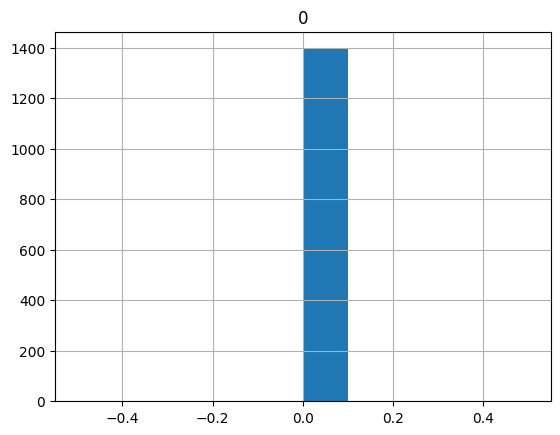

In [52]:
#Histograma, considerando a parte de teste, prevendo o target baseado no limiar de classificação de 50%
# O histograma mostra que o modelo classificou quase 200 instâncias como spam (1) e 1200 instâncias como não spam (0)
pd.DataFrame(y_pred).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

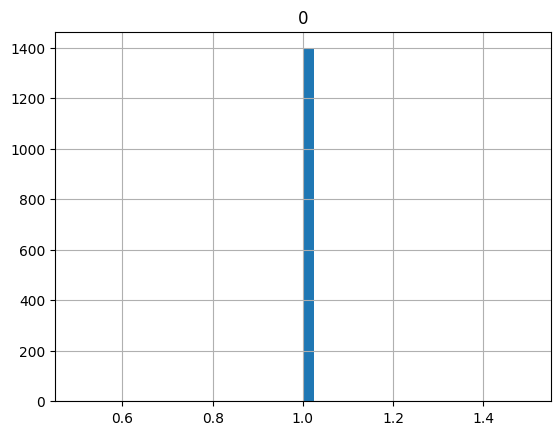

In [53]:
#Histograma, considerando a parte de teste, com a saída das probabilidades da classe positiva (1), ex: é spam
pd.DataFrame(y_proba_1).hist(bins = 40)

In [59]:
#Cálculo de métricas, baseadas no limiar de classificação de 50%.
from sklearn.metrics import accuracy_score, precision_score, recall_score
#Para acurácia, precision e recall, passar sempre y_test que é a verdade (target) anotada na base supervisionada e y_pred que é a saída que o modelo gerou, escorando o espaço de características de teste, produzindo uma saída: 0 se a probabilidade é <=50%, caso contrário 1.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn import metrics
# Cálculo da área abaixo da curva ROC, o método roc_auc_score leva os seguintes parâmetros
#(i) y_test -> é a verdade anotada na base supervisionada (target) para os dados de teste
#(i) y_proba1 -> é probabilidade do acerto na classe postiva, extraída pelo modelo ao escorar os espaços de característica de teste
area = metrics.roc_auc_score(y_test,y_proba_1)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [64]:
area

[89             I'm really not up to it still tonight babe
 5152    No problem with the renewal. I.ll do it right ...
 1964    it to 80488. Your 500 free text messages are v...
 1097                              Ryder unsold.now gibbs.
 4257    Block Breaker now comes in deluxe format with ...
                               ...                        
 3680    Promotion Number: 8714714 - UR awarded a City ...
 1039    naughty little thought: 'its better to flirt, ...
 2633    URGENT! Your mobile No 077xxx WON a £2,000 Bon...
 4513    Sorry I missed you babe. I was up late and sle...
 5245    thanks for the temales it was wonderful. Thank...
 Name: text, Length: 4458, dtype: object,
 4178    He's in lag. That's just the sad part but we k...
 5216             I keep ten rs in my shelf:) buy two egg.
 3687               Wake me up at  &lt;#&gt;  am morning:)
 1802    excellent. I spent  &lt;#&gt;  years in the Ai...
 768     I'm nt goin, got somethin on, unless they meet...
              

In [67]:
# Os parâmtros de entrada são os mesmos do método anterior:
#(i) y_test -> é a verdade anotada na base supervisionada (target) para os dados de teste
#(i) y_proba1 -> é probabilidade do acerto na classe postiva, extraída pelo modelo ao escorar os espaços de característica de teste
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_proba_1 )
# Este método metrics.roc_curve retorna três variáveis do tipo vetor:
#(i) (fpr) vetor da métroca false positive rate
#(ii) (tpr) vetor da métrica true positive rate
#(iii) Vetor dos limiares de classificação utilizados para gerar o gráfico

ValueError: Found input variables with inconsistent numbers of samples: [1115, 1394]

In [ ]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.8 , 0.78,
       0.76, 0.75, 0.74, 0.72, 0.71, 0.67, 0.66, 0.65, 0.64, 0.62, 0.6 ,
       0.59, 0.58, 0.54, 0.52, 0.51, 0.49, 0.46, 0.4 , 0.39, 0.32, 0.31,
       0.3 , 0.28, 0.27, 0.25, 0.24, 0.23, 0.22, 0.2 , 0.19, 0.18, 0.17,
       0.16, 0.15, 0.14, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05,
       0.04, 0.03, 0.02, 0.01, 0.  ])

In [ ]:
tpr

array([0.        , 0.03225806, 0.06451613, 0.11827957, 0.19354839,
       0.23655914, 0.27419355, 0.29032258, 0.31182796, 0.32795699,
       0.34946237, 0.37634409, 0.41397849, 0.41935484, 0.46774194,
       0.48924731, 0.5       , 0.52688172, 0.54301075, 0.58064516,
       0.6344086 , 0.65591398, 0.66129032, 0.67204301, 0.68817204,
       0.69354839, 0.70430108, 0.72043011, 0.73655914, 0.74731183,
       0.75268817, 0.77419355, 0.77956989, 0.79569892, 0.80645161,
       0.8172043 , 0.82795699, 0.84408602, 0.85483871, 0.88172043,
       0.90322581, 0.90322581, 0.92473118, 0.93010753, 0.93548387,
       0.94086022, 0.94623656, 0.9516129 , 0.95698925, 0.95698925,
       0.96236559, 0.96236559, 0.97311828, 0.97311828, 0.97311828,
       0.97849462, 0.97849462, 0.97849462, 0.97849462, 0.97849462,
       0.97849462, 0.98387097, 0.98387097, 0.98924731, 0.98924731,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [ ]:
thresholds

array([2.  , 1.  , 0.96, 0.95, 0.94, 0.92, 0.9 , 0.88, 0.87, 0.86, 0.85,
       0.83, 0.82, 0.81, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72,
       0.71, 0.69, 0.68, 0.67, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.35,
       0.34, 0.33, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.25, 0.24, 0.23, 0.22,
       0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.1 , 0.09, 0.08, 0.05,
       0.02])

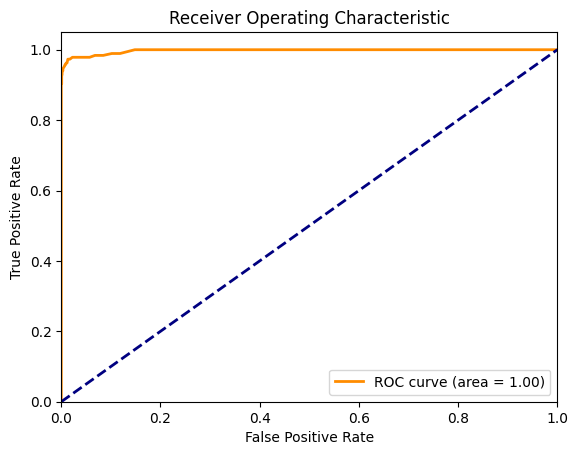

In [ ]:
import matplotlib.pyplot as plt

# Como plotar a curva roc com um gráfico

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_1)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()